# Project: Wrangling and Analyze Data

## Data Gathering.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#downloading the Twitter archive data manually
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#using the request library to download image-predictions programmatically
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as image_predictions_file:
    image_predictions_file.write(response.content)

In [2]:

Image_predictions_file = pd.read_csv('image-predictions.tsv',sep ='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
tweets = []
for id_num in range(0, 2356): # 2356 is the total number of tweet_id
    try:
        tweets.append(api.get_status(twitter_archive['tweet_id'][id_num],tweet_mode='extended'))
        print(twitter_archive['tweet_id'][id_num])
    except:
        print("sorry this tweet is not available!")


892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
sorry this tweet is not available!
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369

TypeError: Object of type 'Status' is not JSON serializable

In [9]:
import json
with open('tweet_json.txt', 'w') as f:
    for tweet in tweets:
        f.write(json.dumps(tweet._json))
        f.write('\n')

In [3]:
import json
tweet2 = []
with open('tweet_json.txt','r') as file:
    for twit in file:
        twit_dictionary = json.loads(twit)
        id = twit_dictionary['id_str']
        Retweet_count = twit_dictionary['retweet_count']
        Favourite_count =  twit_dictionary['favorite_count']
        tweet2.append({'tweet_id':id,
                   'retweet_count':Retweet_count,
                   'favorite_count':Favourite_count
                 })
        
additional_data = pd.DataFrame(tweet2, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data



In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
Image_predictions_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
additional_data.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7054,33921
1,892177421306343426,5328,29410
2,891815181378084864,3503,22129
3,891689557279858688,7260,37048
4,891327558926688256,7803,35423


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
861,763103485927849985,NaN,NaN,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,None,None,None,None


In [9]:
Image_predictions_file.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1595,798925684722855936,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,1,West_Highland_white_terrier,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True


In [10]:
additional_data.sample()

,tweet_id,retweet_count,favorite_count
403,821886076407029760,2158,10712


In [11]:
Image_predictions_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Quality issues

1. retweets should not be in the dataset as only original dog ratings are needed. 

2. retweet-related columns are not needed after removing rows with retweets as these columns become empty.

3.  values labeled None in name column should be replaced by np.nan

4. timestamp type is inappropriate, it is string instead of datetime object and also tweet_id  type is inaapropriate it is int instead of string

5. the source column should not contain urls, it should just contain twitter device description of where a tweet comes from

6. Column headers should be more descriptive (examples of non-descriptive column header are img_num, p1, p1_conf, p1_dog, etc.)


7. invalid dog names like a, such, getting, which are usually in lower case should be removed entirely.From visual inspection I was able to deduce that those entries are not actually dogs but some other animals.

8. Some of the rating numerators are not correctly extracted. For instance, 9.75 is extracted as 75

### Tidiness issues
1. The three tables make a single observational unit so there is no need for them to be split

2. the columns doggo, floofer, pupper, puppo should be variables under a column named dog_stages

## Cleaning Data


In [13]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()



In [14]:
Image_predictions_file_copy = Image_predictions_file.copy()

In [15]:
additional_data_copy = additional_data.copy()

### Issue #1:
The content of the source column is not in a valid form

#### Define
extract source of tweet from the urls in the source column using the webscraping package beautiful soup

#### code

In [16]:
from bs4 import BeautifulSoup
source_list =[]
for i in range(0,2356):
    soup = BeautifulSoup(twitter_archive_copy['source'][i], 'html.parser')
    source_of_tweet = soup.a.contents[0]
    source_list.append(source_of_tweet)
twitter_archive_copy.drop(['source'], axis = 1, inplace = True)


In [17]:
twitter_archive_copy['source'] = source_list

#### test

In [18]:
twitter_archive_copy['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### issue 2: change columns to appropriate data type

#### define
I intend to change  to the correct tweet_id columns in both the twitter_archive-enhanced and the Image_predictions dataset to the appropriate datatype. Also timestamp column in the twitter_archive_enhanced dataset will be changed to datetime object data type

#### code

In [19]:
twitter_archive_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype(str)
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])
Image_predictions_file_copy['tweet_id']= Image_predictions_file_copy['tweet_id'].astype(str)

#### test

In [23]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
source                        2175 non-null object
dtypes: datetime64[ns](1), fl

In [24]:
Image_predictions_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #3: Remove invalid data

#### Define:
I intend to remove all retweets from the Twitter_archive_copy dataset

#### code:

In [25]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_timestamp.isnull()]

#### test:

In [26]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone


### Issue #4:Drop non-needed columns

#### Define:
I intend to drop the columns in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id ,retweeted_status_user_id ,retweeted_status_timestamp from the twitter_archive_enhanced dataset. This is as a result of the fact that the number of entries in this columns are very small and they will also not be useful in later analysis.

#### Code

In [27]:
twitter_archive_copy.drop(['in_reply_to_status_id' ,'in_reply_to_user_id', 'retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [28]:
twitter_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone


#### issue 5: replace and remove invalid entries in the name column

#### define
I intend to remove all entries with that are not title case in the name column from the twitter_archive_enhanced dataset
and then replace all None values in the column with np.nan

#### code

In [29]:
import numpy as np
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['name'].apply(lambda x:x.istitle())]


In [30]:
twitter_archive_copy['name'].replace('None',np.nan, inplace = True)


#### test

In [31]:
sum(twitter_archive_copy['name']=="None") #hence there are no values labeled None in the name column anymore

0

#### Issue 6: rename columns

#### define
rename columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog in the Image_predictions dataset to more suitable names



#### code


In [32]:
Image_predictions_file_copy.rename(columns= {'p1': 'first_prediction',
                   'p1_conf': 'confidence_metric(first_prediction)', 'p1_dog':'is_Dog_breed(first_prediction)','p2': 'second_prediction',
                   'p2_conf': 'confidence_metric(second_prediction)', 'p2_dog':'is_Dog_breed(second_prediction)','p3': 'third_prediction',
                   'p3_conf': 'confidence_metric(third_prediction)', 'p3_dog':'is_Dog_breed(third_prediction)'}, inplace=True)

#### Test

In [33]:
Image_predictions_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                                2075 non-null object
jpg_url                                 2075 non-null object
img_num                                 2075 non-null int64
first_prediction                        2075 non-null object
confidence_metric(first_prediction)     2075 non-null float64
is_Dog_breed(first_prediction)          2075 non-null bool
second_prediction                       2075 non-null object
confidence_metric(second_prediction)    2075 non-null float64
is_Dog_breed(second_prediction)         2075 non-null bool
third_prediction                        2075 non-null object
confidence_metric(third_prediction)     2075 non-null float64
is_Dog_breed(third_prediction)          2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue  7: One variable in four columns

#### Define
combine columns doggo, floofer, pupper, puppo into a single column called dog_stages

#### Code

In [34]:
twitter_archive_copy['dog_stages'] = 'None'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']=='None')&(twitter_archive_copy['floofer']=='None')&(twitter_archive_copy['pupper']=='None')&(twitter_archive_copy['puppo']=='puppo'), 'dog_stages'] = 'puppo'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']=='None')&(twitter_archive_copy['floofer']=='floofer')&(twitter_archive_copy['pupper']=='None')&(twitter_archive_copy['puppo']=='None'), 'dog_stages'] = 'floofer'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']=='None')&(twitter_archive_copy['floofer']=='None')&(twitter_archive_copy['pupper']=='pupper')&(twitter_archive_copy['puppo']=='None'), 'dog_stages'] = 'pupper'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']=='doggo')&(twitter_archive_copy['floofer']=='None')&(twitter_archive_copy['pupper']=='None')&(twitter_archive_copy['puppo']=='None'), 'dog_stages'] = 'doggo'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']!='None')&(twitter_archive_copy['floofer']!='None'), 'dog_stages']= 'Multi_stage'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']!='None')&(twitter_archive_copy['pupper']!='None'), 'dog_stages']= 'Multi_stage'
twitter_archive_copy.loc[(twitter_archive_copy['doggo']!='None')&(twitter_archive_copy['puppo']!='None'), 'dog_stages']= 'Multi_stage'
twitter_archive_copy.loc[(twitter_archive_copy['floofer']!='None')&(twitter_archive_copy['pupper']!='None'), 'dog_stages']= 'Multi_stage'
twitter_archive_copy.loc[(twitter_archive_copy['floofer']!='None')&(twitter_archive_copy['puppo']!='None'), 'dog_stages']= 'Multi_stage'
twitter_archive_copy.loc[(twitter_archive_copy['pupper']!='None')&(twitter_archive_copy['puppo']!='None'), 'dog_stages']= 'Multi_stage'

twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [35]:
twitter_archive_copy['dog_stages'].replace('None',np.nan, inplace = True)


#### Test

In [36]:
twitter_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Twitter for iPhone,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Twitter for iPhone,NaN


#### Issue 8: Incorrect extraction of decimal values for rating_numerator

#### define
I intend to use regex to extract decimal values for rating_numerator

#### code

In [37]:
import re
replacement = twitter_archive_copy.text.str.extract(r'(\d+\.?\d*?(?=/10))').astype(float)


In [38]:
twitter_archive_copy['rating_numerator']=  replacement 

#### test

In [39]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2065 non-null object
timestamp             2065 non-null datetime64[ns]
text                  2065 non-null object
expanded_urls         2007 non-null object
rating_numerator      2051 non-null float64
rating_denominator    2065 non-null int64
name                  1385 non-null object
source                2065 non-null object
dog_stages            330 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 161.3+ KB


### Issue #9:
The tables can all be combined to be the same observational unit

#### define
I intend to merge the tables of twitter_archive_enhanced, Image_predictions, and tweet_json.txt together

#### code

In [40]:
twitter_archive_master_temp =  pd.merge(twitter_archive_copy,Image_predictions_file_copy,  how="outer", on=["tweet_id"])

In [41]:
twitter_archive_master = pd.merge(twitter_archive_master_temp,additional_data_copy, how = "outer", on = ["tweet_id"])

#### test

In [42]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 22 columns):
tweet_id                                2345 non-null object
timestamp                               2065 non-null datetime64[ns]
text                                    2065 non-null object
expanded_urls                           2007 non-null object
rating_numerator                        2051 non-null float64
rating_denominator                      2065 non-null float64
name                                    1385 non-null object
source                                  2065 non-null object
dog_stages                              330 non-null object
jpg_url                                 2075 non-null object
img_num                                 2075 non-null float64
first_prediction                        2075 non-null object
confidence_metric(first_prediction)     2075 non-null float64
is_Dog_breed(first_prediction)          2075 non-null object
second_prediction           

Finally I intend to drop rows that don't have entries for favorite_count and retweet count

In [43]:
twitter_archive_master.dropna(subset = ['favorite_count'], axis =0, inplace = True)

In [44]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2344
Data columns (total 22 columns):
tweet_id                                2327 non-null object
timestamp                               2057 non-null datetime64[ns]
text                                    2057 non-null object
expanded_urls                           1999 non-null object
rating_numerator                        2043 non-null float64
rating_denominator                      2057 non-null float64
name                                    1378 non-null object
source                                  2057 non-null object
dog_stages                              329 non-null object
jpg_url                                 2057 non-null object
img_num                                 2057 non-null float64
first_prediction                        2057 non-null object
confidence_metric(first_prediction)     2057 non-null float64
is_Dog_breed(first_prediction)          2057 non-null object
second_prediction           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


In [46]:
Most_retweets = twitter_archive_master.groupby('dog_stages').sum()['retweet_count'].to_frame().reset_index()
Most_retweets

,dog_stages,retweet_count
0,Multi_stage,49916.0
1,doggo,388390.0
2,floofer,30217.0
3,pupper,419572.0
4,puppo,125581.0


In [47]:
Most_favorite = twitter_archive_master.groupby('dog_stages').sum()['favorite_count'].to_frame().reset_index()
Most_favorite

,dog_stages,favorite_count
0,Multi_stage,163456.0
1,doggo,1146582.0
2,floofer,84905.0
3,pupper,1303707.0
4,puppo,452324.0


In [48]:
ratings= twitter_archive_master.groupby('dog_stages').mean()['rating_numerator'].to_frame().reset_index()
ratings

,dog_stages,rating_numerator
0,Multi_stage,11.181818
1,doggo,11.833333
2,floofer,11.888889
3,pupper,10.705493
4,puppo,12.041667


### Insights:
1. dogs that are in the pupper stage has the most retweets

2. dogs that are in the pupper stage also has the most favorite count

3. dogs that are in the puppo stage also have the highest average rating (i.e for the numerator)

4. the Iphone is the most commont device used by people who rate dogs on twitter

### Visualization

[Text(0.5,1,'Total number of retweets for each dog stage')]

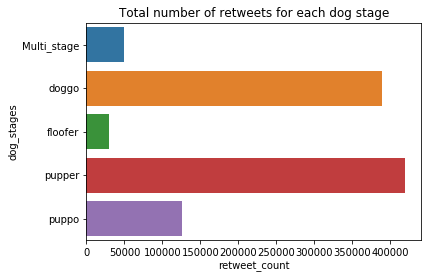

In [53]:
import seaborn as sns
sns.barplot(x="retweet_count", y="dog_stages", data=Most_retweets).set(title = 'Total number of retweets for each dog stage')


[Text(0.5,1,'Total number of favorite_count for each dog stage')]

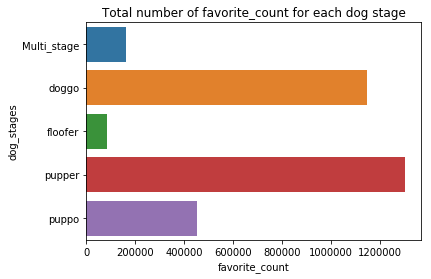

In [50]:
sns.barplot(x="favorite_count", y="dog_stages", data=Most_favorite).set(title = 'Total number of favorite_count for each dog stage')


[Text(0.5,1,'the mean rating for each dog stage')]

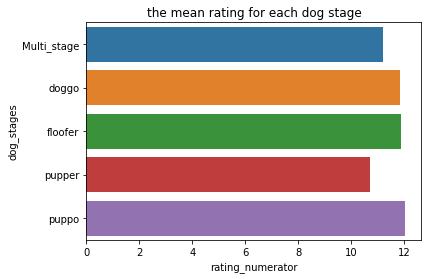

In [51]:
sns.barplot(x="rating_numerator", y="dog_stages", data=ratings).set(title = 'the mean rating for each dog stage')


[Text(0.5,1,'Devices used to access Twitter')]

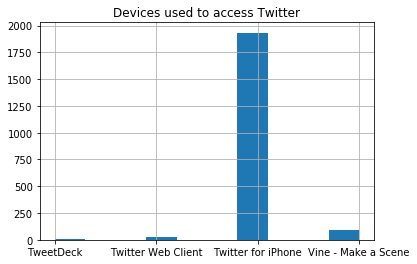

In [52]:
twitter_archive_master['source'].hist().set(title="Devices used to access Twitter")